In [2]:
import os
os.chdir('PET')
from pathlib import Path
if 'ESMFMKFILE' not in os.environ:
    os.environ['ESMFMKFILE'] = str(Path(os.__file__).parent.parent / 'esmf.mk')
import xscen as xs
from xscen import CONFIG
import xarray as xr
from PET_calculations_canada import mix_pet
import warnings
import matplotlib.pyplot as plt

# based on xscen workflow templates: https://xscen.readthedocs.io/en/latest/templates.html
xs.load_config(
    "paths.yml", "config.yml", verbose=(__name__ == "__main__"), reset=True
)
warnings.filterwarnings("ignore")


INFO:xscen.config:Updated the config with paths.yml.
INFO:xscen.config:Updated the config with config.yml.


In [14]:
pcat = xs.ProjectCatalog(CONFIG["pcat"]) # load project catalog

cru = pcat.search(id="cru_ts4_Can").to_dask()
terra = pcat.search(id="terraclimate_Can").to_dask()

cat = xs.search_data_catalogs(**CONFIG["extract"]["simulation"]["search_data_catalogs"]) #to be changed when data added to project catalog
ds_id = list(cat.keys())[0]
dc = cat[ds_id]
ds = dc.to_dask()

In [18]:
# montreal
dsm = ds.sel(lat=45.5, lon=-73.6, method='nearest').load()
crum = cru.pet.sel(lat=45.5, lon=-73.6, method='nearest').load()
terram = terra.pet.sel(lat=45.5, lon=-73.6, method='nearest').load()

pet = mix_pet(ds)
petm= pet.sel(lat=45.5, lon=-73.6, method='nearest').load()


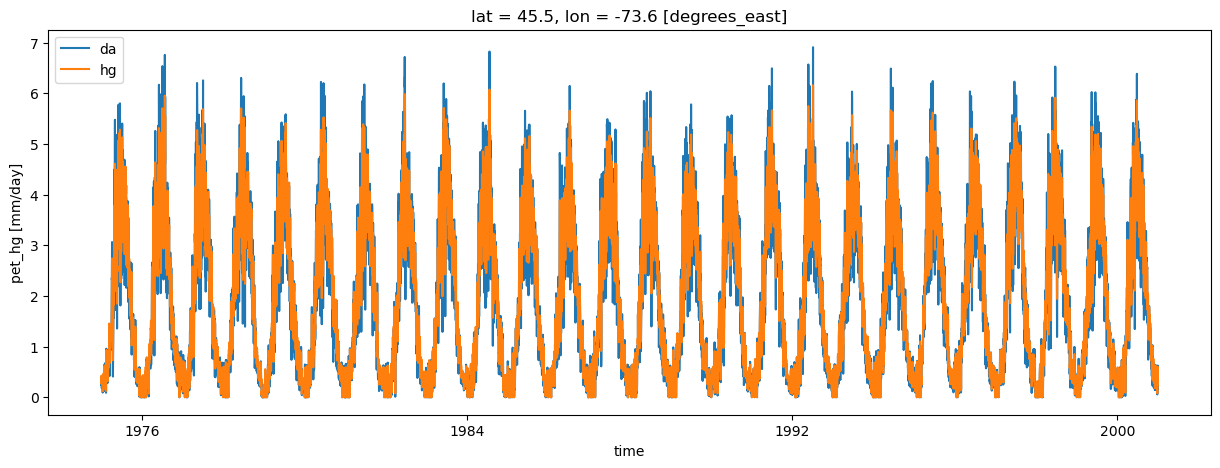

In [8]:
fig, ax = plt.subplots(**{'figsize':(15,5)})
hg2 = petm.pet_hg.sel(time=slice("1975", "2000"))
petm.pet_da.sel(time=slice("1975", "2000")).plot(ax=ax, label='da')
hg2.plot(ax=ax, label='hg')
ax.legend()

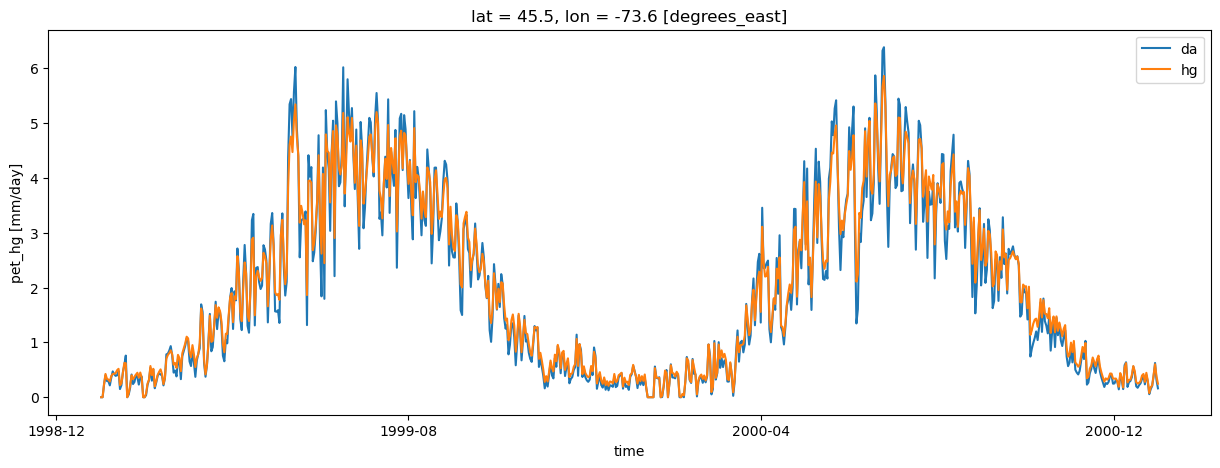

In [9]:
fig, ax = plt.subplots(**{'figsize':(15,5)})
petm.pet_da.sel(time=slice("1999", "2000")).plot(ax=ax, label='da')
petm.pet_hg.sel(time=slice("1999", "2000")).plot(ax=ax, label='hg')
ax.legend()

In [21]:
# monthly mean
hgint = petm.pet_hg
hgm = hgint.resample(time='1M').mean()
datetimeindex = hgm.indexes['time'].to_datetimeindex()
hgm['time'] = datetimeindex
dam = petm.pet_da.resample(time='1M').mean()
datetimeindex = dam.indexes['time'].to_datetimeindex()
hgm['time'] = datetimeindex

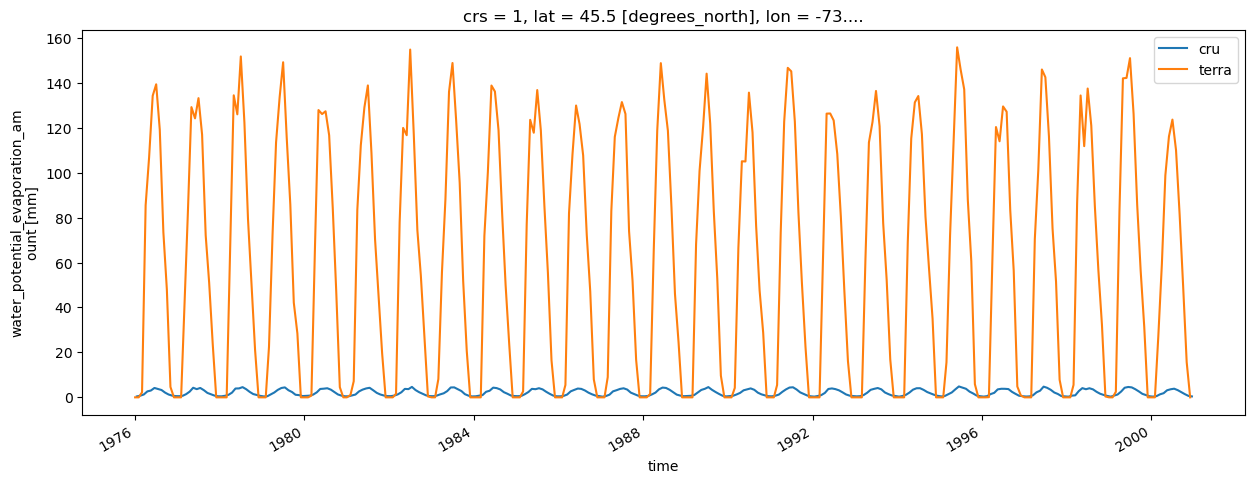

In [19]:
fig, ax = plt.subplots(**{'figsize':(15,5)})
#cru2 = crum.pet * 86400
crum.sel(time=slice("1975", "2000")).plot(ax=ax, label='cru')
terram.sel(time=slice("1975", "2000")).plot(ax=ax, label='terra')
ax.legend()

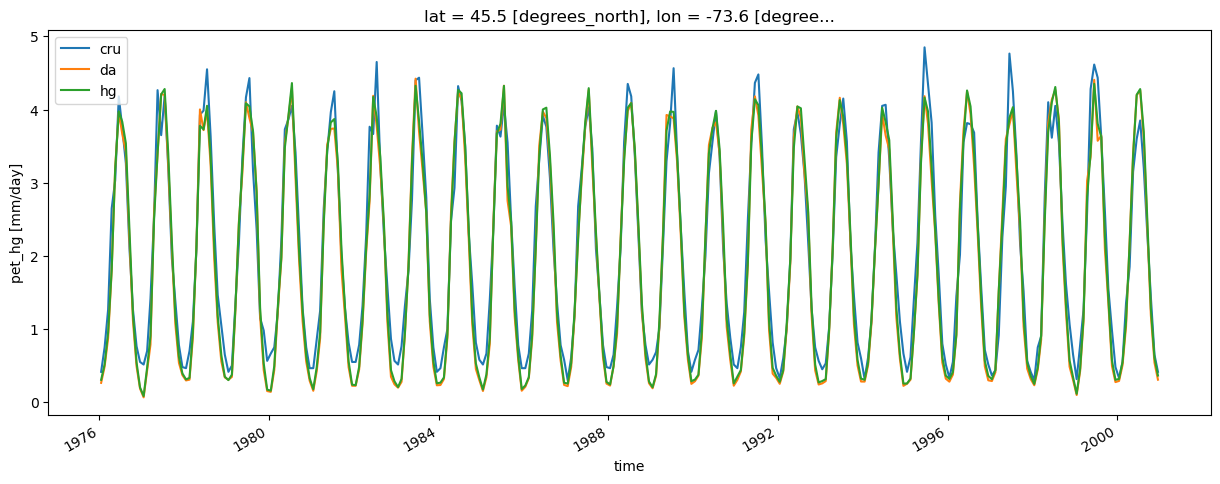

In [22]:

ref_hg = hgm.sel(time=slice("1975", "1999"))
ref_da = dam.sel(time=slice("1975", "1999"))
ref_cru = crum.sel(time=slice("1975", "2000"))

ref_da['time'] = ref_cru["time"]
ref_hg['time'] = ref_cru["time"]

fig, ax = plt.subplots(**{'figsize':(15,5)})
ref_cru.plot(ax=ax, label='cru')
ref_da.plot(ax=ax, label='da')
ref_hg.plot(ax=ax, label='hg')
ax.legend()


In [25]:
# monthly sum
hgint = petm.pet_hg
hgm = hgint.resample(time='1M').sum()
datetimeindex = hgm.indexes['time'].to_datetimeindex()
hgm['time'] = datetimeindex
dam = petm.pet_da.resample(time='1M').sum()
datetimeindex = dam.indexes['time'].to_datetimeindex()
hgm['time'] = datetimeindex

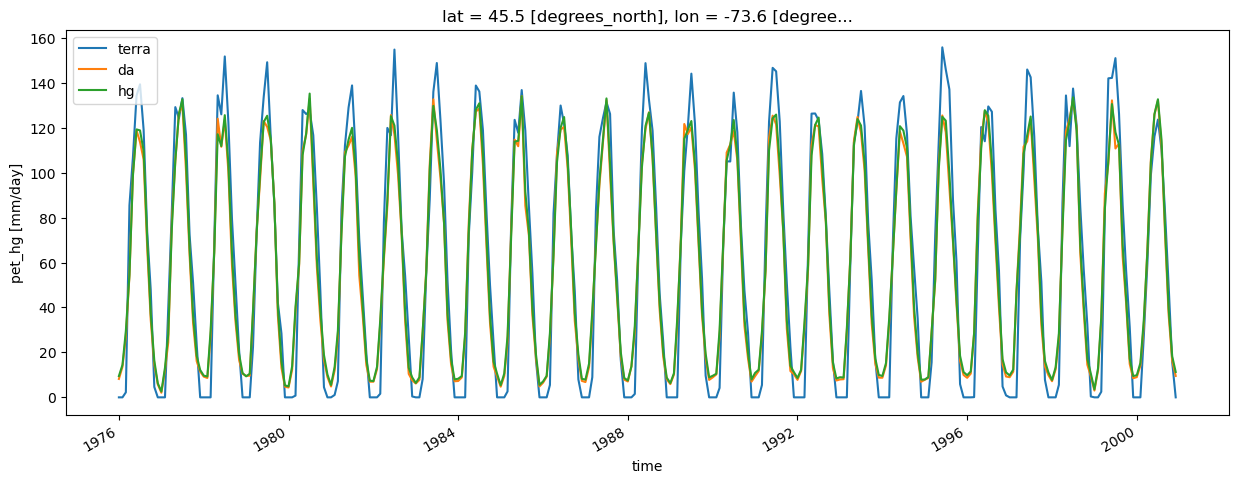

In [26]:
ref_hg = hgm.sel(time=slice("1975", "1999"))
ref_da = dam.sel(time=slice("1975", "1999"))
ref_terra = terram.sel(time=slice("1975", "2000"))

ref_da['time'] = ref_terra["time"]
ref_hg['time'] = ref_terra["time"]

fig, ax = plt.subplots(**{'figsize':(15,5)})
ref_terra.plot(ax=ax, label='terra')
ref_da.plot(ax=ax, label='da')
ref_hg.plot(ax=ax, label='hg')
ax.legend()